In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Machine Learning/Final Project/energydata_complete.csv')

## **View dataset info and fixes**

In [ ]:
print(dataset.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [ ]:
print(dataset.columns)

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [ ]:
print(dataset.shape)

(19735, 29)


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
print(dataset.describe())

         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])

## **Visualizations**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pairs(dataset):
    plt.figure(figsize=(6,6))
    sns.pairplot(
        dataset,
        kind="reg",
        diag_kind="kde",
        plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}},
        diag_kws={'color': 'skyblue'}
    )
    plt.show()

def plot_corr(dataset):
    plt.figure(figsize=(6,6))
    sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
    plt.show()

In [ ]:
subdataset1 = dataset[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
subdataset2 = dataset[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6']]
subdataset3 = dataset[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']]
subdataset4 = dataset[['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM', 'T6']]

### Time Series

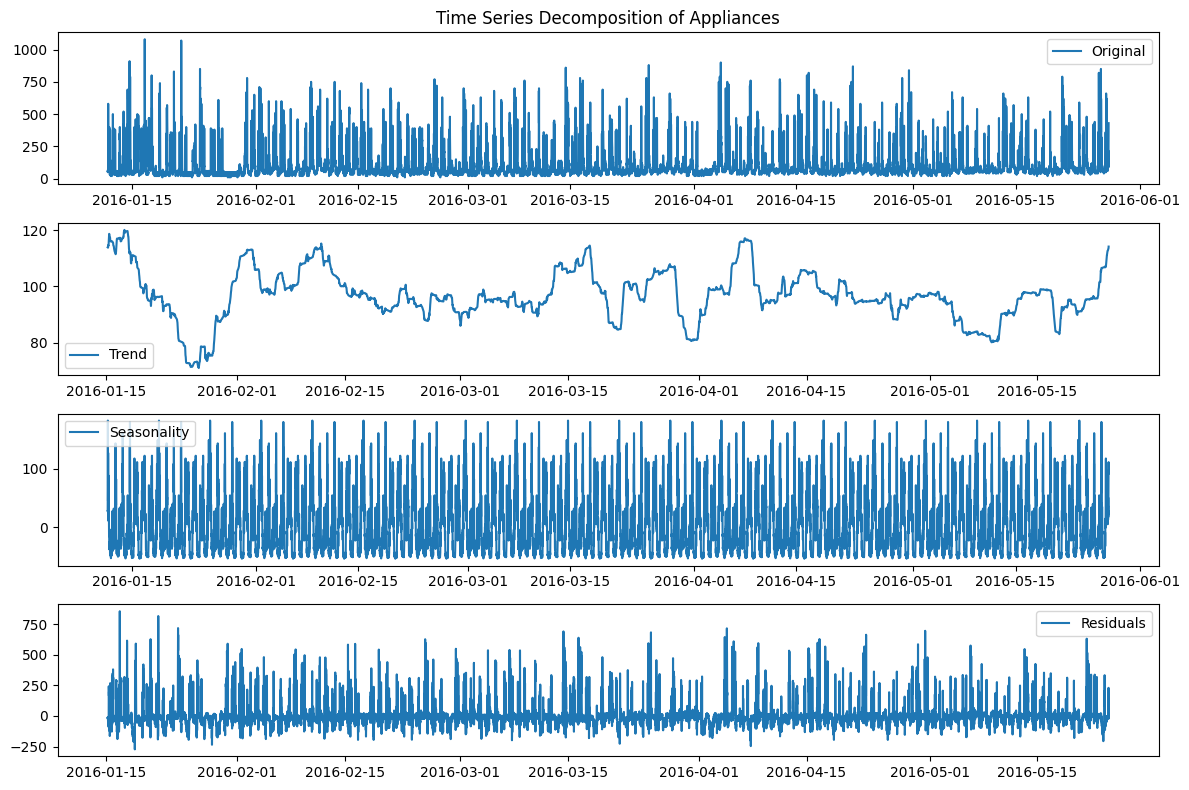

In [ ]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dataset['Appliances'], model='additive', period=144*7)

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(dataset['date'], dataset['Appliances'], label='Original')
plt.legend(loc='best')
plt.title('Time Series Decomposition of Appliances')

plt.subplot(412)
plt.plot(dataset['date'], decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(dataset['date'], decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(dataset['date'], decomposition.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

<Figure size 1600x1600 with 0 Axes>

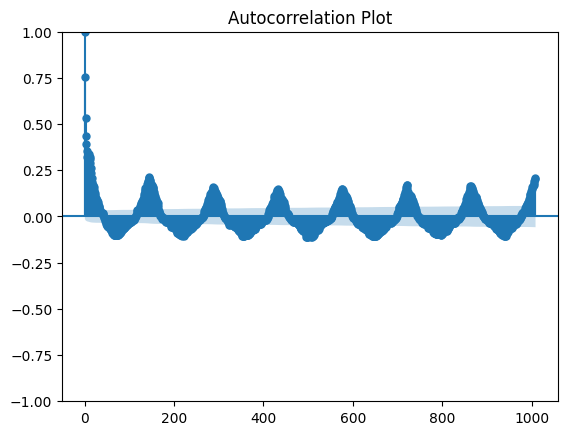

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

# 1008 lags is a week in this dataset

plt.figure(figsize=(16, 16))
plot_acf(dataset['Appliances'], lags=1008, title='Autocorrelation Plot')
plt.show()

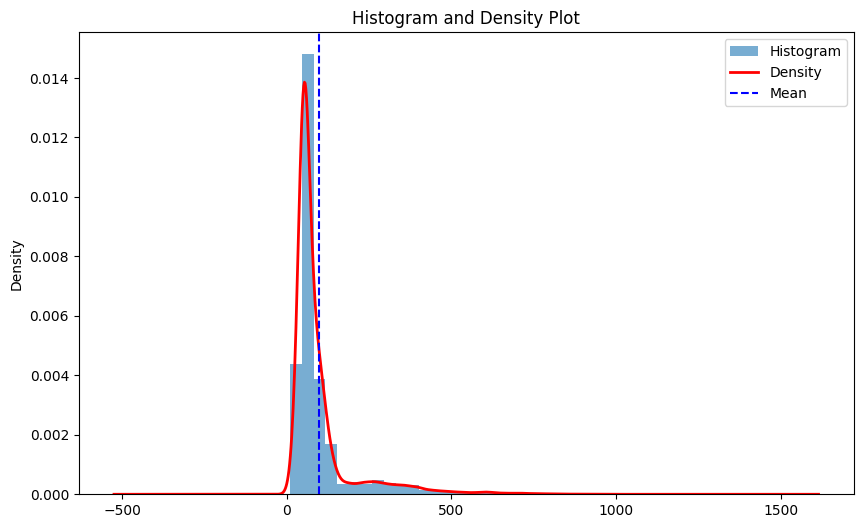

In [ ]:
# Plot histogram and density
plt.figure(figsize=(10, 6))
dataset['Appliances'].hist(bins=30, alpha=0.6, label='Histogram', density=True)
dataset['Appliances'].plot(kind='kde', color='red', label='Density', linewidth=2)
plt.axvline(x=dataset['Appliances'].mean(), color='blue', linestyle='--', label='Mean')
plt.title('Histogram and Density Plot')
plt.legend()
plt.show()

### Pair plots

In [ ]:
plot_pairs(subdataset1)
plot_pairs(subdataset2)
plot_pairs(subdataset3)
plot_pairs(subdataset4)

Output hidden; open in https://colab.research.google.com to view.

### Correlations

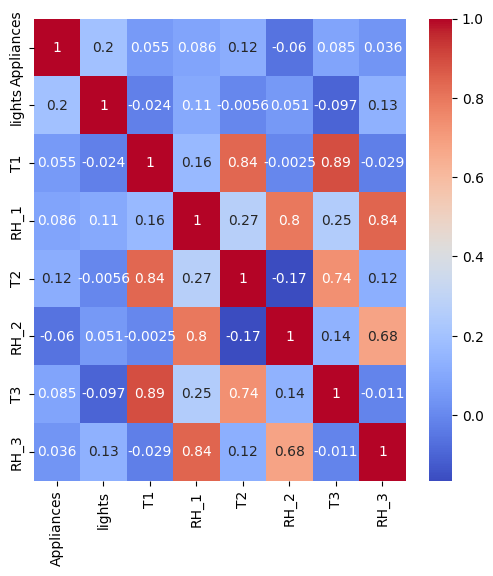

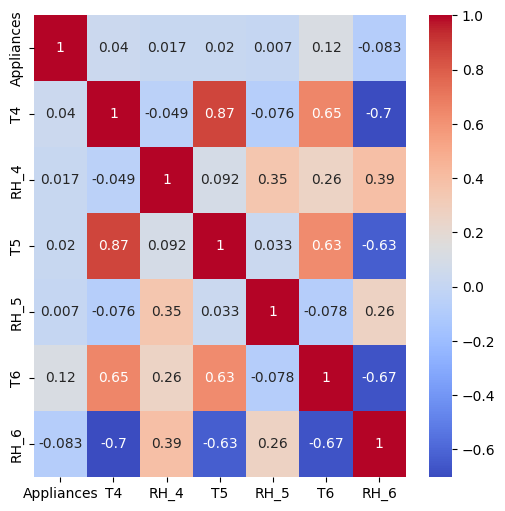

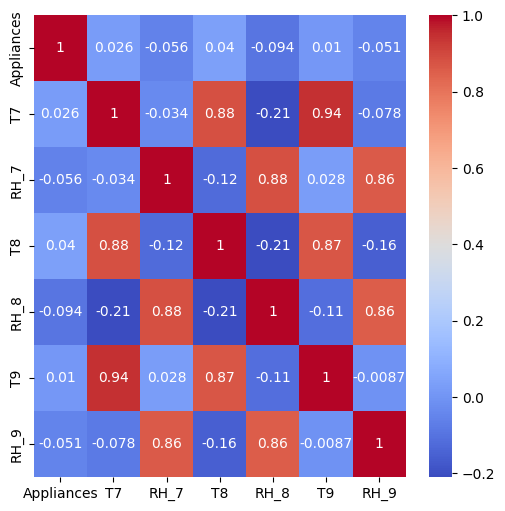

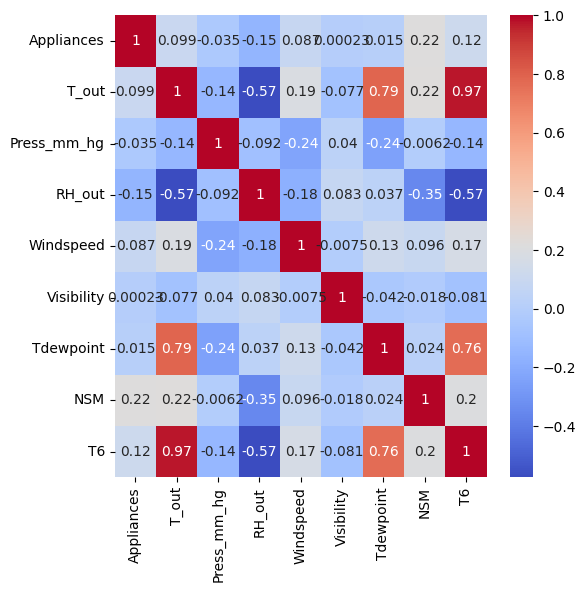

In [ ]:
plot_corr(subdataset1)
plot_corr(subdataset2)
plot_corr(subdataset3)
plot_corr(subdataset4)

## Comparative Results of models

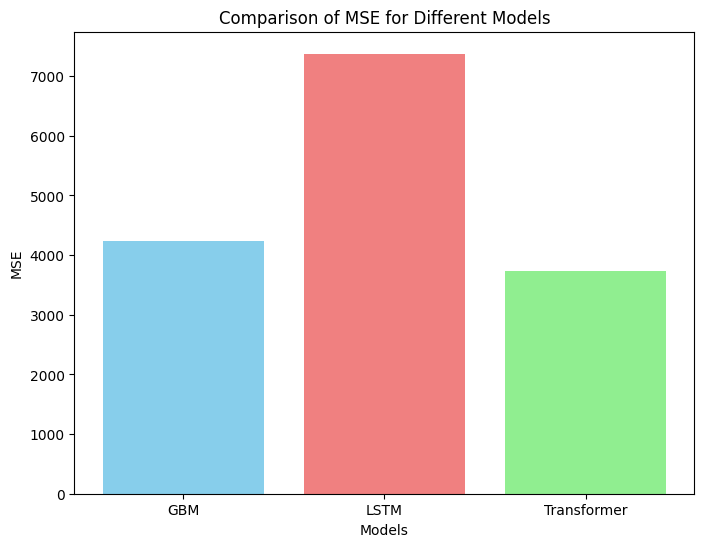

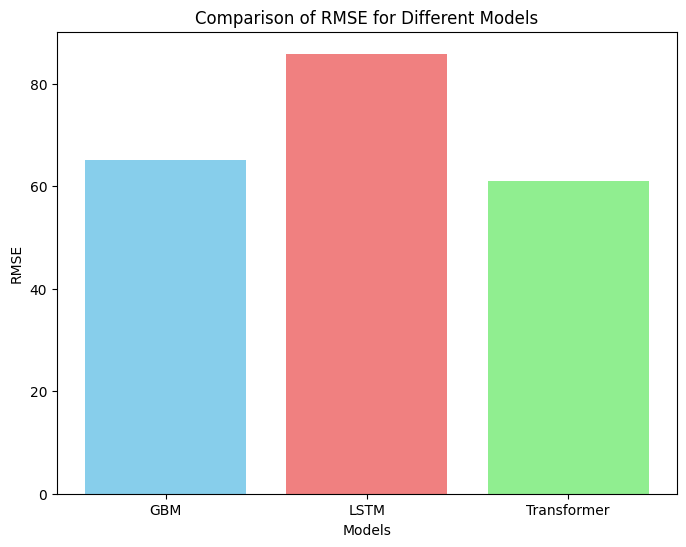

In [7]:
import matplotlib.pyplot as plt

metrics = {
    'GBM': {
        'mse': 4234.46,
        'rmse': 65.07
    },
    'LSTM': {
        'mse': 7376.75,
        'rmse': 85.89
    },
    'Transformer': {
        'mse': 3737,
        'rmse': 61.13
    }
}

metric_names = ['mse', 'rmse']

for metric_name in metric_names:
  metric_values = [metrics[model][metric_name] for model in metrics]
  models = list(metrics.keys())
  plt.figure(figsize=(8, 6))
  plt.bar(models, metric_values, color=['skyblue', 'lightcoral', 'lightgreen'])
  plt.xlabel("Models")
  plt.ylabel(metric_name.upper())
  plt.title(f"Comparison of {metric_name.upper()} for Different Models")
  plt.show()